## a. 결측치 다루기
1. 결측치 다루기
2. 결측치 제거
3. 결측치 체워넣기
## b. 이상치 확인
1. Data_cleaned의 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company' 변수들의 이상치 확인

## c. 중복데이터 다루기
1. 중복데이터 제거 후 data_clean2 로 저장

## d. 데이터 메니플레이션 
1. data_clean2 기준 last_evaluation >0.8 이상인 직원 찾기
2. data_clean2 기준 last_evaluation >0.8 이상 이면서 left 가 1인 직원들 찾기
3. data_clean2 기준 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company' 변수만 포함하는 새로운 데이터 프레임 만들어 data_clean_numeric에 저장
4. data_clean2 기준 last evaluation >0.8 이면서 left 가 1인 경우데 대하여 그룹핑 하고 평균으로 요약하여 간단하게 해석해보기

In [2]:
# 데이터 가져오기
import pandas as pd
import numpy as np
origin_df=pd.read_csv('./datasets/HR_comma_sep.csv')
origin_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
h_df=origin_df.copy()
h_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
# 결측치 확인
h_df.isna().sum() # 결측치 없음

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

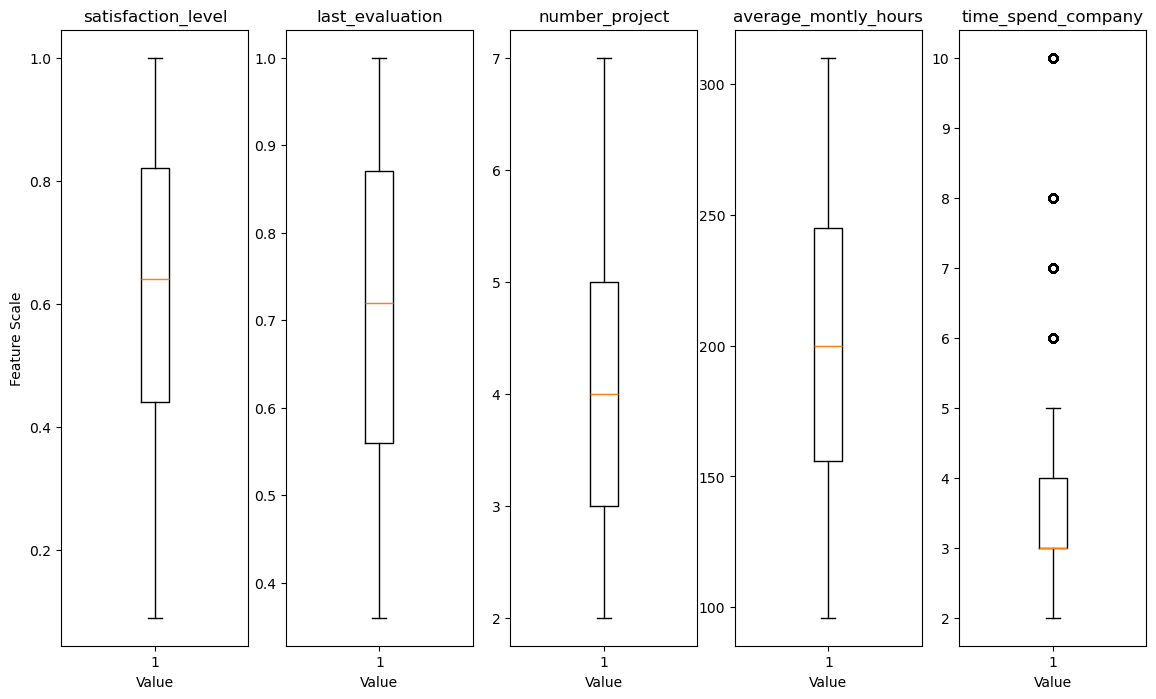

In [68]:
# 이상치 확인
## 컬럼 개수가 많지 않기 때문에 box plot 시각화 후 확인
import matplotlib.pyplot as plt

# DataFrame에서 마지막 두 열을 제외하고 선택
# data_to_plot = h_df.iloc[:, :-2]
features = ["satisfaction_level", "last_evaluation","number_project","average_montly_hours","time_spend_company"]

# Boxplot 생성
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(14, 8)) 

for i, feature in enumerate(features):
    axes[i].boxplot(h_df[feature])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    if i ==0:
        axes[i].set_ylabel('Feature Scale')

plt.show()  

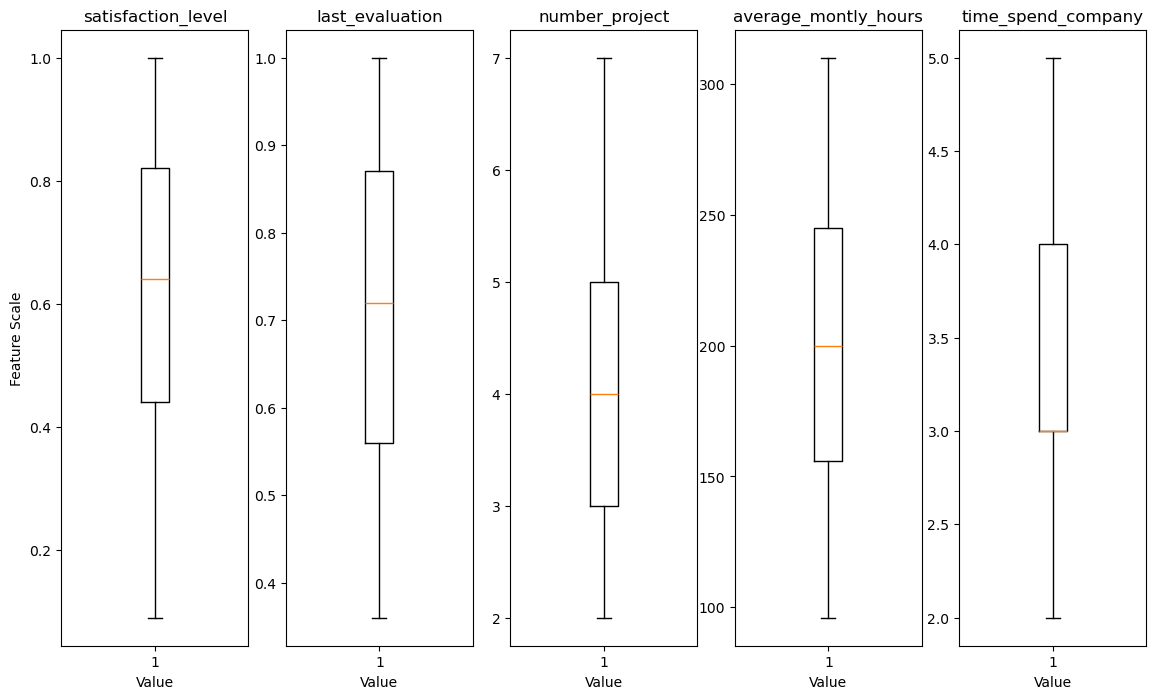

In [96]:
# 시각화 그래프 확인 결과 time_spend_company에 대한 값만 이상치가 확인.

# 방법1. 4분위수 x 1.5 이상인 부분 결측치.
features = ["satisfaction_level", "last_evaluation","number_project","average_montly_hours","time_spend_company"]
h_df[features].describe().T

def drop_outliner_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = (q3-q1) * 1.5

    drop_outliner = df[(df[column] <= (q3+iqr)) & (df[column] >= (q1-iqr))]

    return drop_outliner

# Boxplot 생성
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(14, 8)) 

for i, feature in enumerate(features):
    filtered_data = drop_outliner_iqr(h_df, feature)[feature]  # 이상치 제거된 데이터
    axes[i].boxplot(filtered_data)
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    if i ==0:
        axes[i].set_ylabel('Feature Scale')

# 방법2. StandardScaler 표준화 작업을 통해 +- 1.96 보다 크거나 작을 경우 결측치. (보류)

In [105]:
# 이상치 제거한 데이터 프레임 생성 (기존 index는 살려둔 상태로 수치형 데이터가 아닌 범주형 데이터 열도 포함)

# DataFrame에서 이상치 제거된 버전 생성 (기존 index 유지)
data_clean = h_df.copy()  # 기존 DataFrame 복사

for feature in features:
    valid_idx = drop_outliner_iqr(h_df, feature).index  # 유효한 인덱스 추출
    data_clean = data_clean.loc[valid_idx]  # 유효한 인덱스를 사용하여 데이터 필터링

# 인덱스 제설정
data_clean.reset_index(inplace=True, drop=True)

display(data_clean)

    


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.11,0.88,7,272,4,0,1,0,sales,medium
2,0.72,0.87,5,223,5,0,1,0,sales,low
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
13712,0.40,0.57,2,151,3,0,1,0,support,low
13713,0.37,0.48,2,160,3,0,1,0,support,low
13714,0.37,0.53,2,143,3,0,1,0,support,low
13715,0.11,0.96,6,280,4,0,1,0,support,low


In [114]:
# 중복값 확인 및 제거
print(f"data_clean 중복값: {data_clean.duplicated().sum()}")

data_clean2 = data_clean.drop_duplicates()

print(f"data_clean2 중복값2: {data_clean2.duplicated().sum()}")


data_clean 중복값: 2550
data_clean2 중복값2: 0


In [ ]:
# 데이터 메니플레이션
# data_clean2 기준 last_evaluation >0.8 이상인 직원 찾기
# data_clean2 기준 last_evaluation >0.8 이상 이면서 left 가 1인 직원들 찾기
# data_clean2 기준 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company' 변수만 포함하는 새로운 데이터 프레임 만들어 data_clean_numeric에 저장
# data_clean2 기준 last evaluation >0.8 이면서 left 가 1인 경우데 대하여 그룹핑 하고 평균으로 요약하여 간단하게 해석해보기